In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load the dataset using ; as the delimiter, specifying that the columns *start_at*, *end_at*, and *arrived_at* should be read as dates, and store the result in the variable *taxi*

In [2]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [3]:
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

               end_at       end_lat       end_lon  end_state driver_start_lat  \
0 2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off     -12,10825481   
1 2010-06-01 00:37:00  -12,12465668  -77,02886963  not found              NaN   
2 2010-05-31 05:04:00  -12,13883209  -76,99530029  not found              NaN   
3 2010-06-01 00:32:00  -12,12458801  -77,02896118  not found              NaN   
4 2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon          arrived_at  source  driver_score  rider_score  
0      -77,0272739 2010-11-16 17:02:00  iPhone           5.0          5.0  
1              NaN                 NaT  iPhone           NaN          NaN  
2              NaN                 NaT  iPhone           NaN          NaN  
3              NaN                 NaT  iPhone           NaN          NaN  
4      -76,9277072 2010-09-11 23:50:00  iPhone           4.0          5.0

Check which platform has the most orders

In [4]:
(taxi
     .source.value_counts(normalize=True)
     .mul(100)
     .round())

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: proportion, dtype: float64

To make the difference more clear, let's try to visualize the metrics.

In [5]:
taxi_counts = (taxi['source'].value_counts() # use value_counts to count the values, without any parameters
               .reset_index())               # reset the index

In [6]:
sns.barplot(x='source', y='count', data=taxi_counts, hue='source')
sns.despine()  # remove part of the plot's frame

Check which type of ride (icon) occurred most frequently.

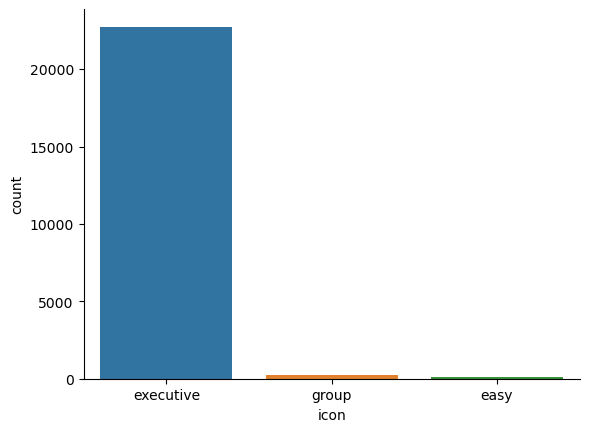

In [7]:
sns.countplot(x='icon', data=taxi, hue='icon')   # create the plot
sns.despine()                                    # remove part of the plot's frame

Visualize the distribution of the variable *end_state* (final order status) broken down by platforms *(source)*

<Axes: xlabel='source', ylabel='count'>

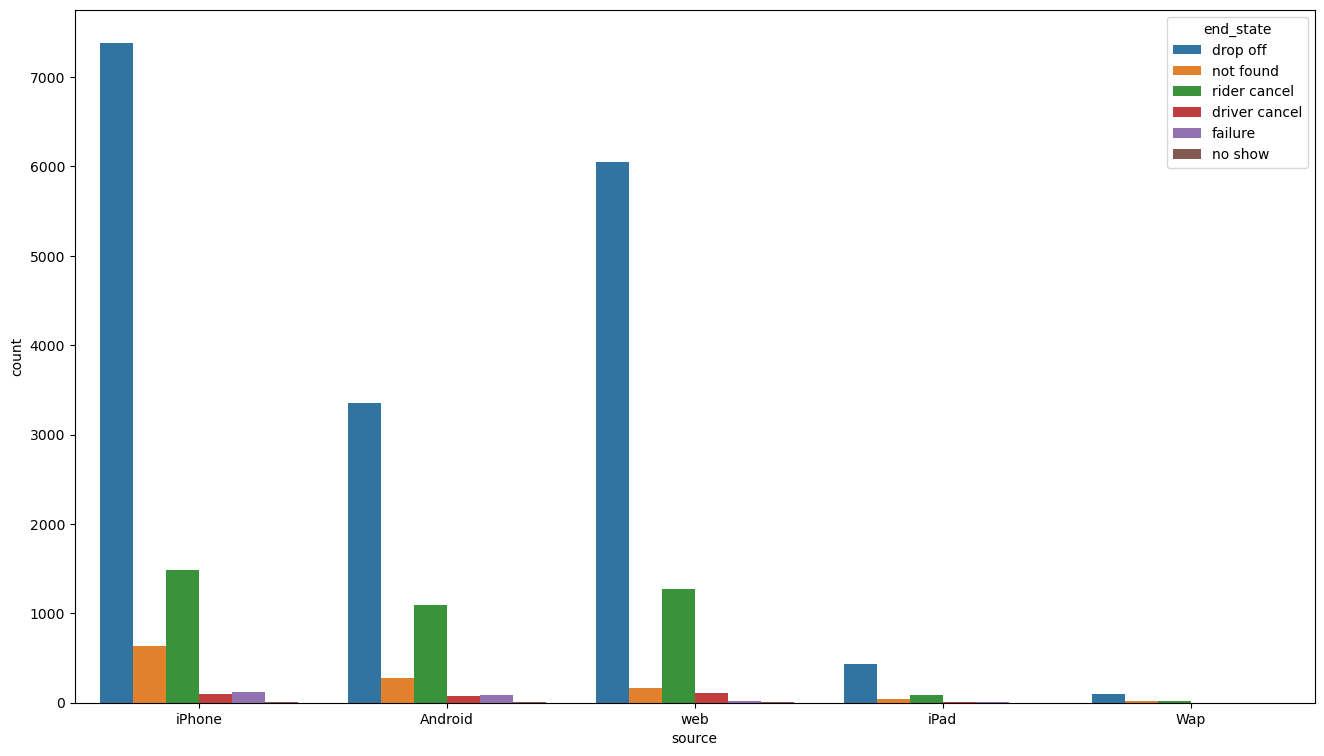

In [8]:
plt.figure(figsize=(16,9))                             # specify the size of the plot to make it larger
sns.countplot(data=taxi, hue='end_state', x='source')  # create the plot with the desired parameters

Let's check how the driver scores *(driver_score)* are distributed

In [9]:
scores = (taxi
     .driver_score
     .value_counts(normalize=True)
     .mul(100)
     .round(2))

In [10]:
scores

driver_score
5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: proportion, dtype: float64

In [11]:
scores = scores.reset_index()

In [12]:
scores

driver_score  proportion
0           5.0       58.81
1           4.0       21.88
2           0.0       14.30
3           3.0        2.97
4           1.0        1.23
5           2.0        0.81

In [13]:
scores = scores.rename(columns={'proportion': 'percentage'})
scores

driver_score  percentage
0           5.0       58.81
1           4.0       21.88
2           0.0       14.30
3           3.0        2.97
4           1.0        1.23
5           2.0        0.81

In [14]:
driver_score_counts = scores.sort_values('driver_score')
driver_score_counts

driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81

Now let's create the plot

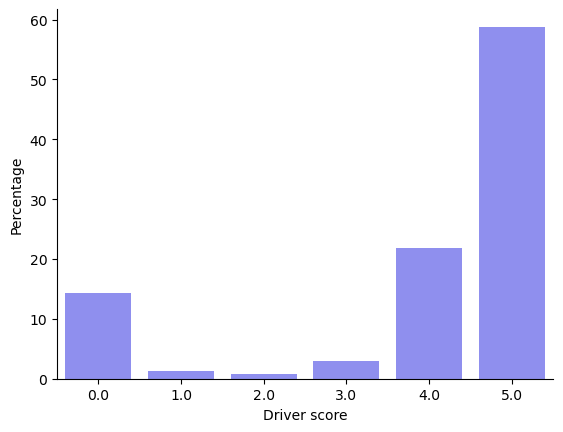

In [15]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # remove part of the plot's frame
plt.show()

Let's see how the *rider_score* differs from the distribution of driver scores.

In [16]:
rider_score_counts = (taxi
     .rider_score
     .value_counts(normalize=True)
     .mul(100)
     .round(2)
     .reset_index()
     .rename(columns={'proportion': 'percentage'})
     .sort_values(by='rider_score'))

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # remove part of the plot's frame
plt.show()

Filter the data to keep only observations with the order status "asap" and "reserved" *(start_type)*

In [17]:
taxi_1 = taxi.loc[taxi.start_type.isin(['asap', 'reserved'])]

Create a column *wait_time*, which will store the difference between the arrival time of the car *(arrived_at)* and the order time *(start_at)* in minutes.

In [18]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'] = taxi['wait_time'] / pd.Timedelta(minutes=1)  # Convert to minutes
taxi[['start_at', 'arrived_at', 'wait_time']].head()

start_at          arrived_at  wait_time
0 2010-11-16 16:44:00 2010-11-16 17:02:00       18.0
1 2010-06-01 00:34:00                 NaT        NaN
2 2010-05-31 05:01:00                 NaT        NaN
3 2010-06-01 00:29:00                 NaT        NaN
4 2010-09-11 23:55:00 2010-09-11 23:50:00       -5.0

Create a similar column *duration*

In [19]:
taxi['duration'] = taxi['end_at'] - taxi['start_at']
taxi['duration'] = taxi['duration'] / pd.Timedelta(minutes=1)  # Convert to minutes
taxi[['start_at', 'end_at', 'duration']].head()

start_at              end_at  duration
0 2010-11-16 16:44:00 2010-11-16 17:29:00      45.0
1 2010-06-01 00:34:00 2010-06-01 00:37:00       3.0
2 2010-05-31 05:01:00 2010-05-31 05:04:00       3.0
3 2010-06-01 00:29:00 2010-06-01 00:32:00       3.0
4 2010-09-11 23:55:00 2010-09-12 01:07:00      72.0

Let's see which drivers were late for orders at a specific time *(start_type == 'reserved')* and identify the driver ID who was late for the order of the type we are interested in the most number of times.

In [20]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)]

journey_id                           user_id  \
11     af7a0d5b65562d9e4f7749317efb1a3a  7abecd4f47c2c1d5390d86eb22181c90   
51     e1b5a14977e84b1900b5b69e040c3de1  1e44c0fd0a266c3719ff30410baa07cd   
67     eb06449983dd990ff162c0ad990909ba  933a5cf7834b12121755b8586b53a083   
83     cd6a65a00f3ac91060d336a9f037f7f6  cb6ea169cefc7a0a5f1f8bd8ebbe3223   
157    e1332f68e81526e498e4d845233a17ee  be2d7041cb5bae52cf3edaaf03798426   
...                                 ...                               ...   
23044  883360491194dd3b866c897b2586a1d7  406921adcca37705ef527b4246c1370e   
23047  88a0d8a123b3c1b2f39bec89da7b30ae  406921adcca37705ef527b4246c12e83   
23053  8b9ae8141b48ed1643e02dbc76aa2290  0f0ffd9676b4aa664f8b88b76ca90cf4   
23063  4a645cbfd25b64d34f738808637353ca  4a645cbfd25b64d34f738808634b36bf   
23104  c21605b791b47423867a99d06f47a972  35e7f74c2fbd27db816811036af892e5   

                              driver_id                           taxi_id  \
11     d04f1a596fe4a582f48e6eb2f9e8f617  d04f1a596fe4a582f48e6eb2f9e8cceb   
51     ae06c34243f741e203e97c48ebcbd9da  f622a9397b85b5c9c0ef938c5d592020   
67     406921adcca37705ef527b4246c0cfea  406921adcca37705ef527b4246c10d2c   
83     baacf396f773709519bbde35a5eab861  baacf396f773709519bbde35a585d91b   
157    65b6f3b7075270499ddd0f1dc1130459  f78d50ea4f0c83a4a302d9fa82264b02   
...                                 ...                               ...   
23044  27c157e605c56c7df70c605963e1d386  27c157e605c56c7df70c605963e1c9b7   
23047  406921adcca37705ef527b4246c19db3  406921adcca37705ef527b4246c1a5c6   
23053  406921adcca37705ef527b4246c19db3  406921adcca37705ef527b4246c1a5c6   
23063  eeb07ac5409c082354b923689341b9ec  aba044a086704ad7e9dc66b8c926408d   
23104  56f59b58bcbbd1cdabc3652e713134c2  924d4f0e7554566623e8ebb3904a7b0c   

            icon start_type            start_at     start_lat     start_lon  \
11     executive   reserved 2010-11-28 03:15:00  -12,10128779  -77,00463697   
51     executive   reserved 2010-10-12 19:45:00  -12,11184692  -77,03222656   
67     executive   reserved 2010-06-01 22:00:00  -12,12078476  -76,97079468   
83     executive   reserved 2010-08-16 22:30:00  -12,10181985  -76,97150599   
157    executive   reserved 2010-03-27 23:30:00   -12,0966369   -77,0295319   
...          ...        ...                 ...           ...           ...   
23044  executive   reserved 2010-02-14 13:45:00   -12,0918521   -77,0519091   
23047  executive   reserved 2010-05-07 13:20:00   -12,0918423   -77,0421839   
23053  executive   reserved 2010-05-09 01:30:00   -12,0780836   -77,0906339   
23063  executive   reserved 2010-04-16 15:15:00   -12,0770342   -76,9885396   
23104  executive   reserved 2010-04-04 17:00:00   -12,1119515   -77,0507767   

                   end_at  ...       end_lon end_state driver_start_lat  \
11    2010-11-28 03:37:00  ...  -77,00418301  drop off      -12,1011259   
51    2010-10-12 20:49:00  ...    -77,109375  drop off     -12,02907305   
67    2010-06-01 22:42:00  ...  -77,06329346  drop off     -12,11143646   
83    2010-08-16 22:57:00  ...  -76,99084405  drop off     -12,06300311   
157   2010-03-28 00:25:00  ...   -77,0048048  drop off     -12,08623295   
...                   ...  ...           ...       ...              ...   
23044 2010-02-14 14:19:00  ...   -77,0232917  drop off      -12,0735807   
23047 2010-05-07 14:13:00  ...   -77,0857564  drop off     -12,03970949   
23053 2010-05-09 02:50:00  ...    -77,107768  drop off     -12,05495955   
23063 2010-04-16 15:40:00  ...   -76,9886223  drop off     -12,04602095   
23104 2010-04-04 17:37:00  ...   -77,0874744  drop off      -12,1115584   

      driver_start_lon          arrived_at   source driver_score  rider_score  \
11         -77,0041831 2010-11-28 03:22:00  Android          NaN          4.0   
51        -77,08317745 2010-10-12 19:56:00   iPhone          NaN          5.0   
67        -76,99240794 2010-06-01 22:01:00   iPhone          4.0          5.0   
83   

In [21]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

#### Consider what factors might influence the number of delays for this driver

##### **Hypothesis 1:** He has the longest trips, which makes it difficult to estimate the time (for example, he was stuck in traffic).

**Let's test this** by calculating the median trip duration for each driver and see if the driver of interest makes it into the top

In [22]:
taxi_1 = taxi.loc[(taxi.start_type == 'reserved')]

In [23]:
taxi_1.groupby('driver_id', as_index = False).duration.median().sort_values('duration', ascending = False)

driver_id  duration
86   a7b047c6a09ccb85e9980d80ffaadb3d     145.0
72   86981d5cc39076d9d0281221fe19f3fa      86.0
2    0fd4a08189ac948f6beaa2d3145c81b6      85.0
22   2d163dcf6f3e01abf4af5b2a721ec5ac      84.0
134  f8cd07f929f6884cd5fea893f4da3461      83.0
..                                ...       ...
47   587ea1ea1ab415acb010ec8308275095       6.0
0    031fea9628f9238b051a58808554498a       5.0
20   2ca81f8112b8c60af222ee2ed7278078       4.0
5    1238e44402a93366489cbff9884bc267      -4.0
93   b3ba9cda1b124b4fdc5d639f2417ca3e     -29.0

[144 rows x 2 columns]

The driver ID *(406921adcca37705ef527b4246c0cfea)* is not present here. Our driver is not in the top 10, so we discard **the hypothesis**.

##### **Hypothesis 2:** He has the most trips overall, which is why he is late more often.

**Let's test** this by finding the top 5 drivers by the number of trips.

In [24]:
taxi_journeys = (taxi_1.groupby('driver_id', as_index=False)
                       .agg(n_journeys=('journey_id', 'count'))
                       .sort_values('n_journeys', ascending=False))
taxi_journeys.head()

driver_id  n_journeys
119  d665fb9f75ef5d9cd0fd89479380ba78         579
109  c814db2127582cf95dea1f74f43127c2         385
34   406921adcca37705ef527b4246c0cfea         363
143  ff5c924e0b630fd7c019a4234059fdf4         359
33   406921adcca37705ef527b4246bbbff5         346

Our driver is in 3rd place, but not 1st. Let's compare this with the top "late" drivers.

In [25]:
taxi_lates = (taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)]
                  .groupby('driver_id', as_index=False)
                  .agg(n_lates=('journey_id', 'count'))
                  .sort_values('n_lates', ascending=False))
taxi_lates.head()

driver_id  n_lates
24  406921adcca37705ef527b4246c0cfea       67
86  d665fb9f75ef5d9cd0fd89479380ba78       59
93  ec84a73745199ff840ecafcb924383ad       57
29  56f59b58bcbbd1cdabc3652e713134c2       51
77  c814db2127582cf95dea1f74f43127c2       45

We see that three drivers are present in both top lists. It makes sense—those who drive more also tend to be late more often.

Let's try to look not at the absolute number of delays, but at their share—perhaps our driver will not be the one with the highest delays.

Once again, let's look at the top 5 by the number of trips:

In [26]:
reserved_journeys = taxi_journeys.merge(taxi_lates, on = 'driver_id')

In [27]:
reserved_journeys['late_score'] = (reserved_journeys['n_lates'] / reserved_journeys['n_journeys']).round(2)
reserved_journeys.sort_values('n_lates', ascending = False).head(5)

driver_id  n_journeys  n_lates  late_score
2   406921adcca37705ef527b4246c0cfea         363       67        0.18
0   d665fb9f75ef5d9cd0fd89479380ba78         579       59        0.10
5   ec84a73745199ff840ecafcb924383ad         330       57        0.17
14  56f59b58bcbbd1cdabc3652e713134c2         130       51        0.39
1   c814db2127582cf95dea1f74f43127c2         385       45        0.12

Here, our driver is in first place for the share of delays—delays occurred in 67 trips out of 363, or in 18% of cases.

However, overall among all drivers, he is not that bad: about half of the drivers were late more often (the median share of delays is 17.4%).

In [28]:
reserved_journeys['late_score'].describe()

count    105.000000
mean       0.219905
std        0.167398
min        0.020000
25%        0.120000
50%        0.170000
75%        0.260000
max        1.000000
Name: late_score, dtype: float64

Conclusion – our driver:

* is one of the most active (makes a lot of trips)
* is not very punctual (though not the least punctual)
  
These factors combined have placed him in the top for delays. If he were a bit more punctual or drove slightly less often, this wouldn't have happened.

A third possible factor is that among the top active drivers, there are the most responsible individuals—whose share of delays is lower than that of 75% of drivers—making it difficult to compete with them.

Add a column for the month, where the month number in which the order was made (based on *start_at*) will be stored, and a column for the weekday – the name of the day of the week.

In [29]:
taxi['month'] = taxi.start_at.dt.month

In [30]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

In [31]:
taxi[['start_at', 'month', 'weekday']].head()

start_at  month   weekday
0 2010-11-16 16:44:00     11   Tuesday
1 2010-06-01 00:34:00      6   Tuesday
2 2010-05-31 05:01:00      5    Monday
3 2010-06-01 00:29:00      6   Tuesday
4 2010-09-11 23:55:00      9  Saturday

Plot the number of orders by month *(month)*

In [32]:
sns.countplot(data=taxi, x='month')

<Axes: xlabel='month', ylabel='count'>

Now, plot the graph by days of the week *(weekday)*

In [33]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [34]:
ax = sns.countplot(data = taxi, x = 'weekday', order=order)
ax.tick_params(axis = 'x', rotation = 45)

We can also look at a few simple metrics that show the number of unique users over a specific period:

In [35]:
DAU = taxi.groupby(taxi.start_at.dt.day).user_id.nunique()
WAU = taxi.groupby('weekday').user_id.nunique()
MAU = taxi.groupby('month').user_id.nunique()

<Axes: xlabel='start_at'>

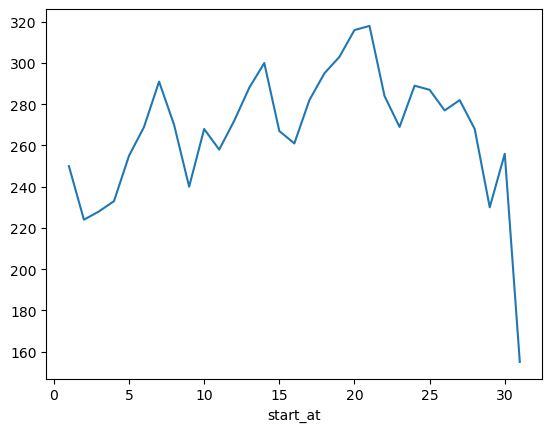

In [36]:
DAU.plot.line()

In [37]:
WAU.plot.line()

<Axes: xlabel='weekday'>

In [38]:
MAU.plot.line()

<Axes: xlabel='month'>